# DeepState metrics
Model: DeepState

Dataset: electricity, exchange rate, solar_nips, traffic_nips

In this notebook we investigate the difference in evaulation scores when the same model is trained and tested multiple times with the same settings but different random seeds. We also explore if the best and worst seeds are consistently good or bad across all timeseries.

In [1]:
import matplotlib.pyplot as plt

from src.metrics import *

In [2]:
metric = ["MAPE"]
n = 10

### Exchange rate

In [3]:
experiment_path = "/datadrive/experiments/deepstate/exchange_rate/2B"
exp = load_data(experiment_path)

len(exp)

100

In [4]:
exp[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,0.000124,0.308903,31.091047,1.036368,0.008791,1.171290,0.009926,0.009983,NaN,33.617745,0.079981,0.000000,0.308903,0.033333,0.392193,0.100000
1,1.0,0.000163,0.317173,47.975410,1.599180,0.016455,0.642496,0.006631,0.006604,NaN,17.886237,0.359247,0.666667,0.317173,0.733333,0.114964,0.833333
2,2.0,0.000406,0.561613,30.113565,1.003786,0.006396,2.927114,0.018688,0.018487,NaN,104.746259,0.897957,0.933333,0.561613,0.933333,0.125576,0.966667
3,3.0,0.000118,0.277629,31.995962,1.066532,0.009511,0.973046,0.008706,0.008667,NaN,28.385631,0.312298,0.600000,0.277629,0.700000,0.119252,0.733333
4,4.0,0.000004,0.054055,4.801961,0.160065,0.000207,8.697799,0.011250,0.011326,NaN,269.780141,0.013340,0.000000,0.054055,0.000000,0.074323,0.033333


In [5]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 0.0002199937049437338
		Std: 3.0033947757851717e-05
		Variance: 0.005480323690974076

	Worst seeds:
		Mean: 0.00028206719434820116
		Std: 1.9928103938582353e-05
		Variance: 0.004464090336114168

	Best seeds:
		Mean: 0.00018312869360670447
		Std: 3.896177076967433e-06
		Variance: 0.0019738737028092146


MASE SCORES
	All seeds:
		Mean: 2.0196959950984366
		Std: 0.20283724343460302
		Variance: 0.4503745590445835

	Worst seeds:
		Mean: 2.4750514030456543
		Std: 0.17116327583789825
		Variance: 0.4137188494205475

	Best seeds:
		Mean: 1.7607829570770264
		Std: 0.03493320196866989
		Variance: 0.18690425157546997


MAPE SCORES
	All seeds:
		Mean: 0.013398821388546717
		Std: 0.0008816384214425474
		Variance: 0.029692396694146254

	Worst seeds:
		Mean: 0.015068178996443748
		Std: 0.0004987819702364504
		Variance: 0.022333426401019096

	Best seeds:
		Mean: 0.01200402993708849
		Std: 0.0002749637351371348
		Variance: 0.016582030802965164




In [6]:
exp_array = calculate_timeseries_means(exp, metric, 8)
exp_array.shape

(100, 8, 1)

In [7]:
exp[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,0.000124,0.308903,31.091047,1.036368,0.008791,1.171290,0.009926,0.009983,NaN,33.617745,0.079981,0.000000,0.308903,0.033333,0.392193,0.100000
8,0.0,0.000056,0.179910,31.412418,1.047081,0.008773,0.683605,0.005722,0.005727,NaN,15.927238,0.103509,0.200000,0.179910,0.366667,0.134273,0.566667
16,0.0,0.000052,0.163773,31.442495,1.048083,0.008757,0.623371,0.005233,0.005217,NaN,14.854695,0.158182,0.333333,0.163773,0.533333,0.063627,0.733333
24,0.0,0.000604,0.664202,31.072994,1.035766,0.008744,2.532017,0.021431,0.021151,NaN,87.813681,1.028376,0.966667,0.664202,1.000000,0.151865,1.000000
32,0.0,0.000092,0.231371,30.949823,1.031661,0.008724,0.884055,0.007507,0.007476,NaN,24.116466,0.248150,0.500000,0.231371,0.666667,0.094645,0.666667
1,1.0,0.000163,0.317173,47.975410,1.599180,0.016455,0.642496,0.006631,0.006604,NaN,17.886237,0.359247,0.666667,0.317173,0.733333,0.114964,0.833333
9,1.0,0.000619,0.677937,48.259655,1.608655,0.016415,1.376649,0.014018,0.014136,NaN,46.241650,0.159864,0.000000,0.677937,0.000000,1.014119,0.000000
17,1.0,0.000209,0.306133,48.184841,1.606161,0.016369,0.623383,0.006394,0.006356,NaN,17.778291,0.372004,0.600000,0.306133,0.700000,0.097931,0.866667
25,1.0,0.001062,0.793321,46.918461,1.563949,0.016344,1.617994,0.017036,0.016818,NaN,56.202797,1.230769,0.933333,0.793321,0.966667,0.182149,1.000000


(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 2., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 2., 1., 0., 0., 0., 2., 0., 1., 0., 0., 1.,
        0., 0., 2., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 2., 3., 0., 2.,
        2., 0., 6., 1., 1., 3., 2., 0., 4., 1., 0., 1., 3., 1., 2., 1., 0.,
        0., 0., 3., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 3., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 6., 0., 1., 0., 0., 0., 1., 0., 3.]),
 array([91, 53, 59, 99, 56, 70, 48, 63, 81, 47]),
 array([6., 6., 4., 3., 3., 3., 3., 3., 3., 2.]))

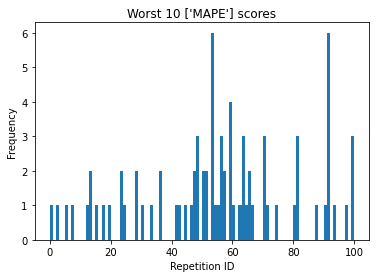

In [8]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([2., 0., 1., 3., 0., 1., 2., 2., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 3., 0., 1., 0., 2., 0., 0., 0., 1., 1., 4., 0., 2., 0.,
        1., 2., 0., 0., 2., 2., 0., 0., 0., 1., 2., 2., 0., 1., 0., 2., 3.,
        2., 1., 0., 0., 0., 1., 0., 2., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        2., 0., 1., 0., 1., 0., 1., 1., 0., 0., 2., 2., 1., 0., 0., 1., 1.,
        0., 0., 5., 0., 1., 0., 0., 0., 0., 0., 0., 1., 2., 1., 0.]),
 array([87, 30,  3, 20, 50, 49, 68, 58, 51, 45]),
 array([5., 4., 3., 3., 3., 2., 2., 2., 2., 2.]))

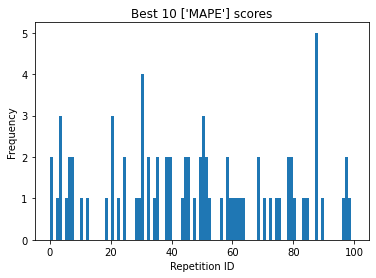

In [9]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Traffic nips

In [10]:
experiment_path = "/datadrive/experiments/deepstate/traffic_nips/2B"
exp = load_data(experiment_path)

len(exp)

100

In [11]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 0.0017738741828417582
		Std: 0.0005862910616667353
		Variance: 0.024213447950813104

	Worst seeds:
		Mean: 0.00308031914755702
		Std: 0.0004171070468146354
		Variance: 0.020423198118805885

	Best seeds:
		Mean: 0.0011025237618014216
		Std: 3.2280328014167026e-05
		Variance: 0.005681578069925308


MASE SCORES
	All seeds:
		Mean: 2.108737697666436
		Std: 0.5359192455679597
		Variance: 0.7320650555571955

	Worst seeds:
		Mean: 3.177582263946533
		Std: 0.22570113837718964
		Variance: 0.47508013248443604

	Best seeds:
		Mean: 1.3661978244781494
		Std: 0.07767528295516968
		Variance: 0.27870285511016846


MAPE SCORES
	All seeds:
		Mean: 0.9898091667506135
		Std: 0.29122743020518926
		Variance: 0.539654917706852

	Worst seeds:
		Mean: 1.586249589920044
		Std: 0.1200198158621788
		Variance: 0.34643876552581787

	Best seeds:
		Mean: 0.5932246446609497
		Std: 0.03499850258231163
		Variance: 0.18707886338233948




In [12]:
exp_array = calculate_timeseries_means(exp, metric, 963)
exp_array.shape

(100, 963, 1)

(array([ 94.,  30., 260., 134.,   0.,   0.,   7., 104., 272.,   4., 215.,
          3.,  13.,   1., 253., 350.,   0.,  34., 681.,   0.,   0.,   0.,
          0.,   0.,   0.,   6., 243.,  13., 274.,   0., 225.,   0.,  11.,
        424.,   0.,   5.,   1., 263.,  36.,   0.,   3., 201.,   0.,   0.,
          0.,   0., 269.,   0., 291.,   0., 159.,   0.,  37.,  52., 126.,
        397.,   0.,   0.,  89., 134.,   4.,  36.,  29.,   4., 105., 459.,
          0., 114., 177.,  33.,  12., 243.,  11., 267.,  14.,   0.,  93.,
        313.,  50.,  58., 211., 271., 390.,  10., 307.,  33.,   0.,   0.,
         82.,   0., 436.,   0.,   9.,  52.,  48.,   0.,   0.,   0.,   0.,
         45.]),
 array([18, 65, 90, 33, 55, 82, 15, 77, 84, 48]),
 array([681., 459., 436., 424., 397., 390., 350., 313., 307., 291.]))

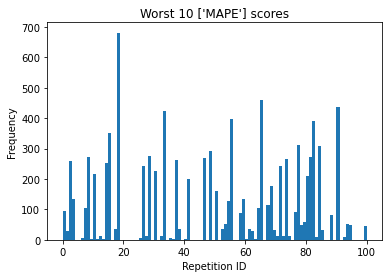

In [13]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([146., 113.,  12.,  43., 237.,  54.,  48.,  61.,  65., 196.,  76.,
         95.,  12., 168.,   7.,   0., 178.,  65.,  10.,  60., 159.,  81.,
        262., 255., 296.,  73.,  21.,  87.,   1., 366.,   8., 477., 231.,
          9.,  94., 169., 132.,  27.,  38., 160.,  60.,   0., 106., 166.,
        272.,  28.,  36., 195.,   2., 404.,  27.,  58., 106.,  19.,   4.,
         11., 176., 112.,   1.,  19., 230.,  32.,  51.,  65.,  13.,   3.,
         33.,   8.,  55.,   4., 144.,   6.,  78.,   1.,  51., 222.,  47.,
          4.,  20.,  83.,  22.,  33.,  19.,   2.,   3.,  78., 197., 223.,
         39., 386.,  64., 217., 124.,  88., 113., 106., 154.,   0., 214.,
          4.]),
 array([31, 49, 89, 29, 24, 44, 22, 23,  4, 32]),
 array([477., 404., 386., 366., 296., 272., 262., 255., 237., 231.]))

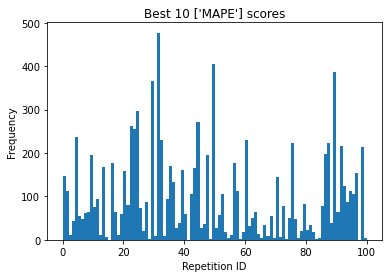

In [14]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Solar nips

In [15]:
experiment_path = "/datadrive/experiments/deepstate/solar_nips/2B"
exp = load_data(experiment_path)

len(exp)

100

In [16]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 2563.649661964626
		Std: 1269.1483760040664
		Variance: 35.625108785855886

	Worst seeds:
		Mean: 5465.20166015625
		Std: 878.2244262695312
		Variance: 29.634851455688477

	Best seeds:
		Mean: 1320.2576904296875
		Std: 23.163148880004883
		Variance: 4.812810897827148


MASE SCORES
	All seeds:
		Mean: 2.593577513551835
		Std: 0.8994430411074602
		Variance: 0.9483897095115806

	Worst seeds:
		Mean: 4.394707679748535
		Std: 0.37839117646217346
		Variance: 0.6151350736618042

	Best seeds:
		Mean: 1.4272050857543945
		Std: 0.04432816430926323
		Variance: 0.21054254472255707


MAPE SCORES
	All seeds:
		Mean: 2.1471896510308355
		Std: 1.123262378286208
		Variance: 1.059840732509469

	Worst seeds:
		Mean: 4.341320991516113
		Std: 0.49186766147613525
		Variance: 0.7013327479362488

	Best seeds:
		Mean: 0.6719645261764526
		Std: 0.04662467911839485
		Variance: 0.21592748165130615




In [17]:
exp_array = calculate_timeseries_means(exp, metric, 137)
exp_array.shape

(100, 137, 1)

(array([  0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.,
          0., 136., 126.,   0.,   0.,   0.,   0., 136., 119.,   0.,   2.,
          0.,   0.,   0.,  40.,   0.,   0., 116.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 114.,   0.,   0.,  14.,   0.,   0.,   5.,   0.,
          0.,   0.,   0., 118.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   7.,   0.,  14., 131.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  13., 133.,
          1.]),
 array([32, 40, 34, 98, 83, 35, 41, 69, 50, 58]),
 array([137., 136., 136., 133., 131., 126., 119., 118., 116., 114.]))

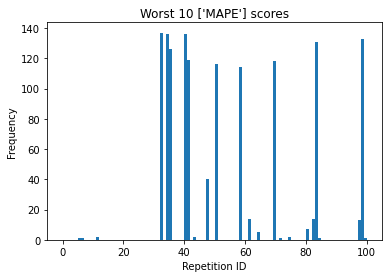

In [18]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([  2.,   3.,   1.,   3.,   0.,   0.,   0.,   1.,   9., 119.,  33.,
         10.,  10.,   0.,   0.,  75.,   0.,   0.,   0.,  83.,   0.,   0.,
          0.,   2.,   0.,   1.,   0.,  35.,   0.,  66.,   1.,  93.,   0.,
          0.,   0.,   0.,   1.,  57.,   2.,  85.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0., 119.,   0.,   5.,   0.,
         19.,   2., 100.,   0.,   0.,  12.,   0.,  35.,   1.,   0.,   0.,
          6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,  11., 104.,   0.,  12.,   0.,   0.,   0.,   0.,  85.,   0.,
          0.,  84.,   0.,   0.,   0.,  46.,  28.,   0.,   0.,   0.,   0.,
          6.]),
 array([51,  9, 79, 57, 31, 39, 86, 89, 19, 15]),
 array([119., 119., 104., 100.,  93.,  85.,  85.,  84.,  83.,  75.]))

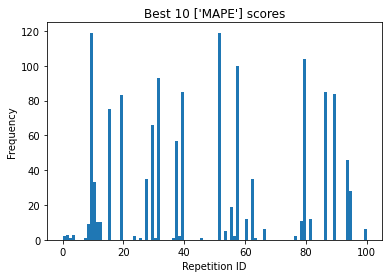

In [19]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Electricity

In [20]:
experiment_path = "/datadrive/experiments/deepstate/electricity/2B"
exp = load_data(experiment_path)

len(exp)

100

In [21]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 51918705.70472721
		Std: 35715910.71496421
		Variance: 5976.279002436567

	Worst seeds:
		Mean: 134318128.0
		Std: 39293448.0
		Variance: 6268.44873046875

	Best seeds:
		Mean: 15737411.0
		Std: 2671488.0
		Variance: 1634.46875


MASE SCORES
	All seeds:
		Mean: 5.619078675981622
		Std: 2.0239851805214233
		Variance: 1.4226683311725974

	Worst seeds:
		Mean: 10.084820747375488
		Std: 1.3383475542068481
		Variance: 1.1568697690963745

	Best seeds:
		Mean: 3.107569932937622
		Std: 0.22911515831947327
		Variance: 0.4786597490310669


MAPE SCORES
	All seeds:
		Mean: 0.5925164926295877
		Std: 0.1765693753815143
		Variance: 0.4202015889802349

	Worst seeds:
		Mean: 0.9792218208312988
		Std: 0.15321168303489685
		Variance: 0.3914226293563843

	Best seeds:
		Mean: 0.3748871982097626
		Std: 0.022478198632597923
		Variance: 0.1499273180961609




In [22]:
exp_array = calculate_timeseries_means(exp, metric, 321)
exp_array.shape

(100, 321, 1)

(array([187.,  10.,  11., 236.,   1.,   9.,   2.,  30.,   0.,  12., 307.,
          7.,   0.,   1.,  39.,  31.,   2.,  97.,   7.,   1.,   0.,  63.,
        158.,   0.,   2.,   6.,   2.,   2., 134.,   2.,   3.,   2.,   4.,
          4.,   0.,   0.,   9.,   1.,   0.,   0.,   0.,  93.,   2.,   1.,
          3.,   0.,   1.,   1.,   0.,   1.,   3.,   4.,   9.,  10.,   0.,
          4.,  16.,   9.,   3., 301.,   3., 186.,   5.,  17.,   0.,   1.,
          0., 161.,   5.,   3.,   7.,   2.,   2.,   1.,   6.,   2.,   1.,
          0.,  19.,   4.,   2.,   0., 249.,  17.,   0.,   0.,   0.,   0.,
          0.,   4., 252.,   1.,   1.,  23.,   0., 195.,   2.,   5.,   0.,
        191.]),
 array([10, 59, 90, 82,  3, 95, 99,  0, 61, 67]),
 array([307., 301., 252., 249., 236., 195., 191., 187., 186., 161.]))

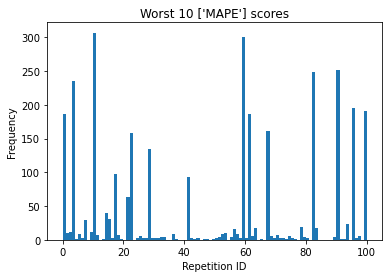

In [23]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([  4.,   1.,  69.,   1.,  32.,  22.,   3.,   3.,  49.,   7.,   0.,
         19.,  31.,   5.,  28.,   5.,  18.,   3.,   1.,  14.,  42.,   3.,
          1.,   0., 113.,   3.,   6.,  25.,   2.,  31.,   1.,  42.,  34.,
         16., 115., 193.,  27.,  31.,  33.,  93.,   6.,   1.,  35.,  17.,
          1., 234.,   3., 219., 180.,  21.,   5., 215.,   3.,   0.,   8.,
          7.,   1.,   3.,   8.,   1.,   3.,   3.,   8.,   1.,  57., 103.,
         10.,  12.,  54.,   3.,   2.,   2.,   3., 106.,   8., 199.,   9.,
          5.,   0.,   6.,   4.,   7.,   0.,   0.,  21.,  87.,  23., 215.,
          3.,  29.,   0.,   7.,   7.,  13.,   5.,   1.,  36.,  11.,  49.,
          4.]),
 array([45, 47, 51, 87, 75, 35, 48, 34, 24, 73]),
 array([234., 219., 215., 215., 199., 193., 180., 115., 113., 106.]))

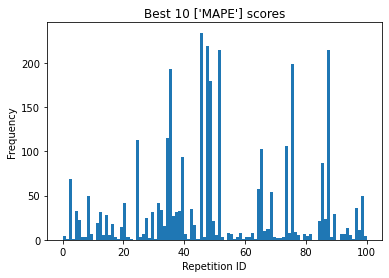

In [24]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]